# **Problem Statement / Background / Objective**

Banks that provide services have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.

`Objective`:

Build a neural network-based classifier that can determine whether or not bank customers will leave in the next 6 months


Steps to follow:
1. **Reading Dataset and Feature Elimination**: *Read the dataset properly - Print the overview of the data (statistical summary, shape, info, etc) - Eliminate the unique features from the dataset with proper reasoning* - **5 points**
2. **Perform an Exploratory Data Analysis on the data**: *Bivariate analysis - Use appropriate visualizations to identify the patterns and insights - Come up with a customer profile (characteristics of a customer) of the different packages - Any other exploratory deep dive* - **5 points**
3. **Illustrate the insights based on EDA**: *Key meaningful observations from Bivariate analysis* - **5 points**
4. **Data Pre-processing**: *Split the target variable and predictors - Split the data into train and test - Rescale the data* - **10 points**
5. **Model building**: *Build Neural Network* - **10 points**
6. **Model Performance Improvement**: *Comment on which metric is right for model performance evaluation and why? - Find the optimal threshold using ROC-AUC or Precision-Recall curves - Comment on model performance - Can model performance be improved? check and comment - Build another model to implement these improvements - Include all the model which were trained to reach at the final one* - **15 points**
7. **Model Performance Evaluation**: *Evaluate the model on different performance metrics and comment on the performance and scope of improvement* - **5 points**
8. **Conclusion and key takeaways**: *Final conclusion about the analysis* - **2.5 points**
9. **Notebook overall**: *Structure and flow - Well commented code* - **2.5 points**

# **Import & Inspect**

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, normalize
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import ClusterCentroids

import keras
import tensorflow as tf
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam, SGD

from sklearn.utils import class_weight

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, auc

from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score, roc_auc_score,accuracy_score

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving bank.csv to bank.csv


In [ ]:
#read data and assign to dataframe
df = pd.read_csv('bank.csv')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
#first 5 records of dataframe
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
#get count of unique values per feature
df.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [ ]:
# Check for NULL values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
# Check for MISSING values
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
# Check for Duplicates
df.duplicated().sum()

0

OBSERVATIONS:
  - the dataset contains 10,000 records and 14 columns (features)

  - features are of int, float, and object datatype

  - CustomerId appears to be a unique customer id which is not needed

  - RowNumber appears to be a unique row id which is not needed

  - for all other valid columns there are no null values nor duplicate rows

In [ ]:
#dropping unique identifiers as they have no inferential value
df.drop(['RowNumber','CustomerId'],axis=1,inplace=True)
print(df.shape)
print(df.columns)

(10000, 12)
Index(['Surname', 'CreditScore', 'Geography', 'Gender', 'Age', 'Tenure',
       'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember',
       'EstimatedSalary', 'Exited'],
      dtype='object')


In [ ]:
#dataframe summary - numerical
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
#dataframe summary - object
df.describe(include='object')

,Surname,Geography,Gender
count,10000,10000,10000
unique,2932,3,2
top,Smith,France,Male
freq,32,5014,5457


# **Exploratory Data Analysis**

In [ ]:
#Function to display outlier details with html formatting. This makes the EDA info easier to read as the default jupyter text output tends to appear understated
def outlier_detail(z):
  Q1 = df[z].quantile(0.25); Q3 = df[z].quantile(0.75); IQR = Q3 - Q1
  cap = (Q3 + 1.5 * IQR).round(1)
  floor = (Q1 - 1.5 * IQR).round(1)
  cf = df[['Exited', z]]

  over_cap = (cf[z] > (Q3 + 1.5 * IQR)).sum()
  below_cap = (cf[z] < (Q1 - 1.5 * IQR)).sum()
  outlier_sum = over_cap + below_cap

  shtml = cf[(cf[z] > (Q3 + 1.5 * IQR)) | (cf[z] < (Q1 - 1.5 * IQR))].groupby(['Exited']).count().to_html()
  vhtml = ((cf[(cf[z] > (Q3 + 1.5 * IQR))].groupby(['Exited']).count().div(over_cap)*100).round(1).astype('str') + '%').to_html()
  yhtml = ((cf[(cf[z] < (Q1 - 1.5 * IQR))].groupby(['Exited']).count().div(below_cap)*100).round(1).astype('str') + '%').to_html()

  display(HTML('''
                  <div style="float:left; border-style:dotted"><h3 style="text-align:center;text-decoration:underline"># of Outliers per Class</h3>
                    <div style="padding:0px 10px 10px 10px">''' + shtml + '''</div>
                  </div>
                  <div style="float:left; border-style:dotted"><h3 style="text-align:center;text-decoration:underline">% Below Floor < ''' + str(floor) + '''</h3>
                    <div style="padding:0px 10px 10px 10px">''' + yhtml + '''</div>
                  </div>
                  <div style="float:left; border-style:dotted;"><h3 style="text-align:center;text-decoration:underline">% Above Cap > ''' + str(cap) + '''</h3>
                    <div style="padding:0px 10px 10px 10px">''' + vhtml + '''</div>
                  </div>
                  '''))

In [ ]:
#Function for continuous feature bivariate comparisons with the target variable.
def plot(x,target='Exited'):
    fig,axs = plt.subplots(2,2,figsize=(14,4))

    axs[0, 0].set_title('Existing Customers')
    sns.histplot(df[(df[target] == 0)][x],ax=axs[0,0],color='#fff6de',kde=True,stat="density",bins=20,alpha=1,ec='#333',lw=2)

    axs[0, 1].set_title('Attrited Customers')
    sns.histplot(df[(df[target] == 1)][x],ax=axs[0,1],color='#10cce0',kde=True,stat="density",bins=20,alpha=1,ec='white',lw=2)

    sns.boxplot(df[(df[target] == 0)][x],ax=axs[1,0],showmeans=True, color='#fff6de', linewidth=6)

    sns.boxplot(df[(df[target] == 1)][x],ax=axs[1,1],showmeans=True, color='skyblue', linewidth=6)

    fig.patch.set_facecolor('#dfe0ed')
    axs[0, 0].grid(False);axs[0, 1].grid(False);axs[1, 0].grid(False);axs[1, 1].grid(False)

    axs[0, 0].spines['top'].set_color('white');axs[0, 0].spines['right'].set_color('white');axs[0, 0].spines['bottom'].set_color('white');axs[0, 0].spines['left'].set_color('white');axs[0, 0].spines['bottom'].set_linewidth(5);axs[0, 0].spines['left'].set_linewidth(5);axs[0, 0].spines['top'].set_linewidth(5);axs[0, 0].spines['right'].set_linewidth(5);axs[0, 0].patch.set_facecolor('#818188')
    axs[0, 1].spines['top'].set_color('white');axs[0, 1].spines['right'].set_color('white');axs[0, 1].spines['bottom'].set_color('white');axs[0, 1].spines['left'].set_color('white');axs[0, 1].spines['bottom'].set_linewidth(5);axs[0, 1].spines['left'].set_linewidth(5);axs[0, 1].spines['top'].set_linewidth(5);axs[0, 1].spines['right'].set_linewidth(5);axs[0, 1].patch.set_facecolor('#818188')

    for k,artist in enumerate(axs[1,0].artists):
      artist.set_edgecolor('#330000')
      for j in range(k*6,k*6+6):
        line = axs[1,0].lines[j];line.set_color('#330000');line.set_mfc('cyan');line.set_mec('cyan')
    for k,artist in enumerate(axs[1,1].artists):
      artist.set_edgecolor('#330000')
      for j in range(k*6,k*6+6):
        line = axs[1,1].lines[j];line.set_color('#330000');line.set_mfc('cyan');line.set_mec('cyan')

    axs[0, 0].set_ylabel('');axs[0, 1].set_ylabel('');axs[0, 1].set_xlabel('');axs[1, 0].set_ylabel('');axs[1, 1].set_ylabel('');axs[0, 0].set_xlabel('');axs[1, 0].set_xlabel('Existing Customers');axs[1, 1].set_xlabel('Attrited Customers')
    title = x + ' vs Exited'
    fig.suptitle(title, fontsize=20, fontweight="bold")  
    plt.show()

In [ ]:
#Function for continuous numerical histogram/boxplot chart with styling enhancements 
def histogram_boxplot(feature, figsize=(14,5), bins = None):
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           gridspec_kw = {"height_ratios": (.35, .65)}, 
                                           figsize = figsize 
                                           ) 
    sns.boxplot(x=feature, data=df, ax=ax_box2, showmeans=True, color='skyblue', linewidth=6)
    for k,artist in enumerate(ax_box2.artists):
      artist.set_edgecolor('navy')
      for j in range(k*6,k*6+6):
        line = ax_box2.lines[j];line.set_color('navy');line.set_mfc('orange');line.set_mec('orange')
  
    sns.histplot(x=feature, ax=ax_hist2, c='gist_gray_r', data=df, bins=15, stat='density', edgecolor='k', linewidth=2) if bins else sns.histplot(feature, ax=ax_hist2, color='skyblue', bins=15, stat='density', edgecolor='k', linewidth=2) # For histogram
    sns.kdeplot(x=feature, ax=ax_hist2, color='black', data=df, linestyle=":", lw=1)
    ax_box2.grid(False);ax_hist2.grid(False);f2.patch.set_facecolor('#dfe0ed');ax_hist2.set_ylabel('');ax_hist2.set_xlabel('');ax_box2.set_xlabel('')
    ax_box2.set_title(str(feature.name), fontsize=20, fontweight="bold") 
    ax_hist2.axvline(np.mean(feature), color='orange', linestyle='-.', lw=5) # Add mean to the histogram
    ax_hist2.axvline(np.median(feature), color='navy', linestyle='-', lw=5) # Add median to the histogram

In [ ]:
#Function for categorical bar chart with styling enhancements - takes second paramter 'h'. this is for chart height. carts with more features (bars) require greater height
def bar_chart_bar(z,h):
  fig, ax =plt.subplots(figsize=(16, h))
  sns.countplot(y=z, data=df, palette='Greens_r', edgecolor='green', linewidth='1', joinstyle='bevel')
  ax.set_ylabel('');ax.set_xlabel('');ax.set_title(z, fontsize=20, fontweight="bold");fig.patch.set_facecolor('#dfe0ed');ax.grid(False)
  for p in ax.patches:
          total = len(df[z])
          percentage = '{:.1f}%'.format(100 * p.get_width()/total) + '\n' + str(p.get_width())
          #print(percentage)
          x = p.get_x() + p.get_width()
          y = p.get_y() + p.get_height()
          ax.annotate(percentage, (x+10, y-0.1), size = 12, color='black', fontweight="bold", bbox=dict(boxstyle='round,pad=0.3', fc='pink', ec='black', lw=3, alpha=1))
  plt.show()

In [ ]:
#Function for categorical feature bivariate comparisons with the target variable. - takes second paramter 'h'. this is for chart height. carts with more features (bars) require greater height
def stacked_plot(z,h):
    fig, ax =plt.subplots(figsize=(18, h))

    tab = pd.crosstab(df[z], df["Exited"], normalize="index").sort_values("Exited", axis = 1, ascending = False)

    tab.sort_values([z],ascending=False).plot.barh(stacked=True, ax=ax, cmap='Greens_r', figsize=(10, h))

    plt.legend(loc="lower left", frameon=False)
    plt.legend(loc="upper left", facecolor="#ccc", edgecolor="#666", bbox_to_anchor=(1, 1))
    title = z + ' vs Exited'
  
    ax.set_ylabel('');ax.set_xlabel('')
    ax.spines['bottom'].set_color('white');ax.spines['bottom'].set_linewidth(5)
    ax.spines['right'].set_color('white');ax.spines['right'].set_linewidth(5)
    ax.spines['top'].set_color('white');ax.spines['top'].set_linewidth(5)
    ax.spines['left'].set_color('white');ax.spines['left'].set_linewidth(5)
    ax.set_title(title, fontsize=20, fontweight="bold")
    ax.spines['right'].set_linewidth(5)
    ax.patch.set_facecolor('#ccc')
    fig.patch.set_facecolor('#dfe0ed')
    plt.grid(False)
    plt.show()

In [ ]:
#Function for categorical feature bivariate PERCENTAGE comparison with the target variable. Displays percentages in text.
def cat_attr(x):
  ca = ((pd.crosstab(df['Exited'],df[x],normalize='columns').rename_axis(None) *100).round(1).astype('str') + '%')
  print(ca.to_string())



> #### **Observations on Exited**



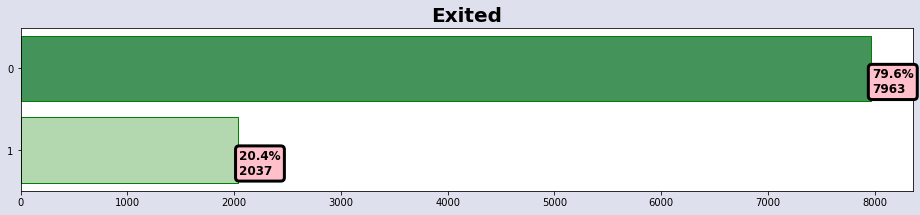

In [ ]:
bar_chart_bar('Exited', 3)



---


`INSIGHTS`

- Our target class `Exited` is 20% exited vs 80% non-exited
- Imbalance in the target class may require Over/Under Sampling


---





> #### **Observations on Surname**



In [ ]:
stacked_plot("Surname",700)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
# What is the value count for surname frequency
df['Surname'].value_counts().value_counts()

1     1558
2      354
3      222
4      177
5      126
6       82
7       64
8       43
12      40
11      35
13      33
14      25
10      24
17      23
9       21
16      20
15      18
19      17
20      15
18      12
22       5
21       4
23       4
25       3
29       2
24       2
26       1
28       1
32       1
Name: Surname, dtype: int64



---


`INSIGHTS`

`Surname` has 2,392 unique values. Most of the unique values have value counts less than 10. Although using a surname as a feature for predictive modeling is interesting, the dataset simply isn't large enough to use surnames for inference. For example, the surname "Abramov" - 100% have exited. However, there is only one record with the surname of "Abramov" in the dataset. Are we to say that 100% of customers named Abramov are going to Exit based on 1 record?
This has the potential to add too much noise to the training set. Therefore, we will remove this feature.


---





> #### **Observations on CreditScore**



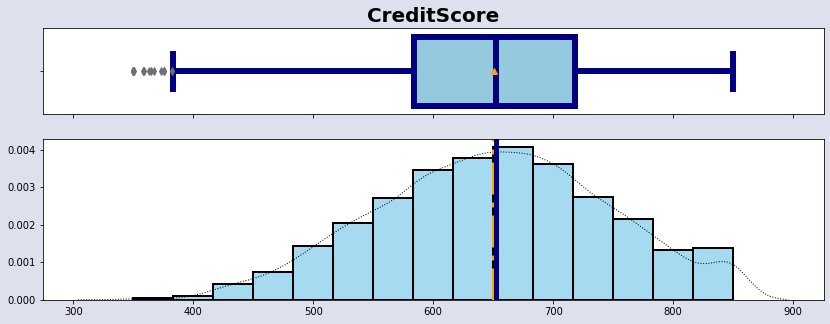

In [ ]:
histogram_boxplot(df['CreditScore'])

In [ ]:
outlier_detail('CreditScore')

,CreditScore
Exited,
1,15
,CreditScore
Exited,
1,100.0%
,CreditScore
Exited,


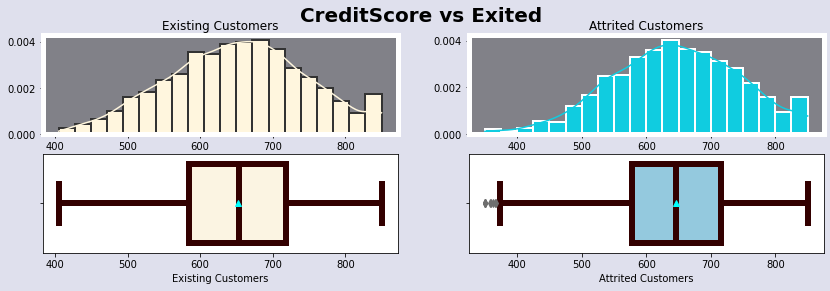

In [ ]:
plot('CreditScore')



---


`INSIGHTS`

`CreditScore` is slighly left-skewed with a few outliers below cap. However, these do not appear to be errors. These appear to be a valid representation of the population. Therefore, these outliers will not be treated. Median and Mean are very close to the same value at 652 and 650 respectively.


---





> #### **Observations on Geography**



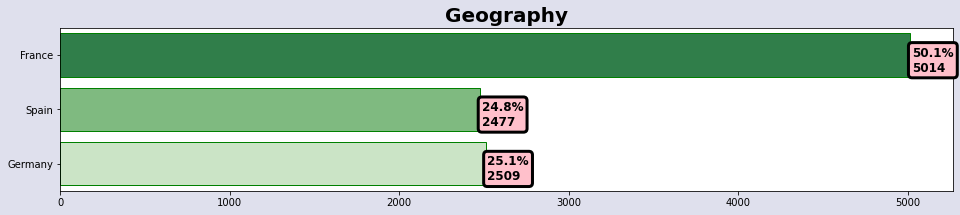

In [ ]:
bar_chart_bar('Geography', 3)

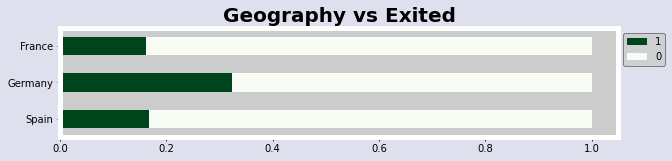

In [ ]:
stacked_plot("Geography",2)

In [ ]:
cat_attr('Geography')

Geography France Germany  Spain
0          83.8%   67.6%  83.3%
1          16.2%   32.4%  16.7%


In [ ]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64



---


`INSIGHTS`

50% of the customers are in France

25% in Spain

25% in Germany

Germany has the highest churn rate - 32% vs 16% (France) and 17% (Spain)


---






> #### **Observations on Gender**



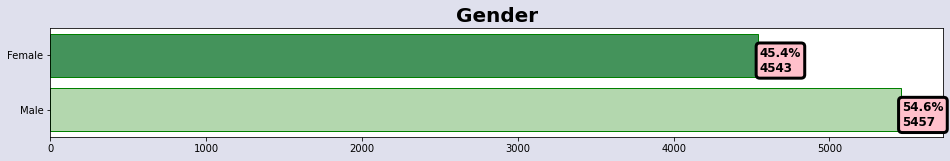

In [ ]:
bar_chart_bar('Gender', 2)


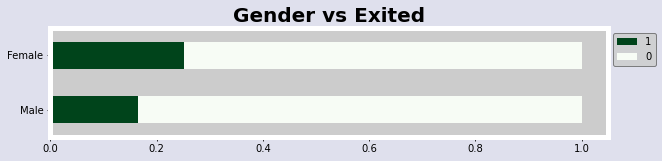

In [ ]:
stacked_plot("Gender",2)

In [ ]:
cat_attr('Gender')

Gender Female   Male
0       74.9%  83.5%
1       25.1%  16.5%




---


`INSIGHTS`

There are more male customers (55%) than female customers (45%). However, females have a higher attrition rate (25%) than males (17%).


---





> #### **Observations on Age**



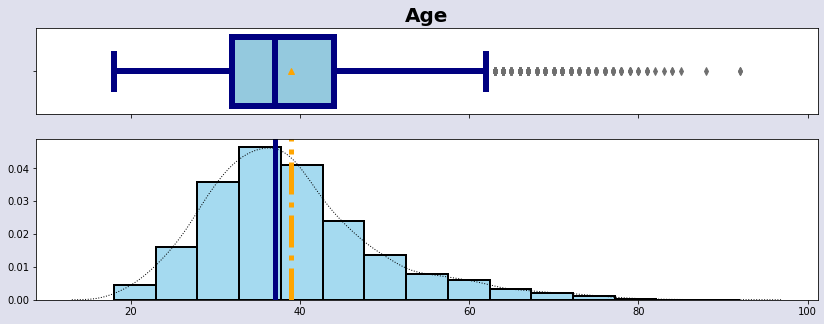

In [ ]:
histogram_boxplot(df['Age'])

In [ ]:
outlier_detail('Age')

,Age
Exited,
0,286
1,73
,Age
Exited,
,Age
Exited,
0,79.7%
1,20.3%


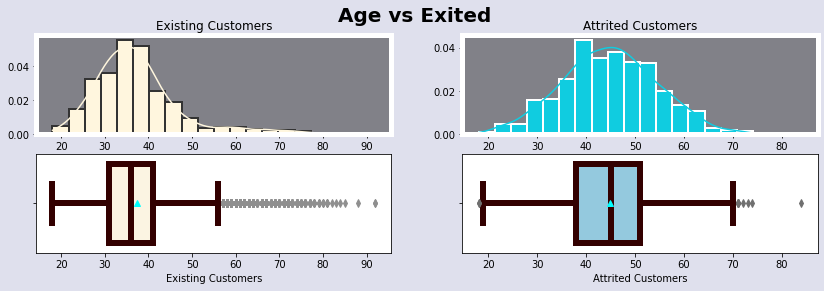

In [ ]:
plot('Age')



---

`INSIGHTS`

`Age` has a right-skewed distribution with outliers. However, these outliers do not appear to be errors. These appear to be a valid representation of the population. Therefore, these outliers will not be treated. The age range of attrited customers is higher than of non-attrited customers. *See the boxplot comparison for both classes above*


---





> #### **Observations on Tenure**



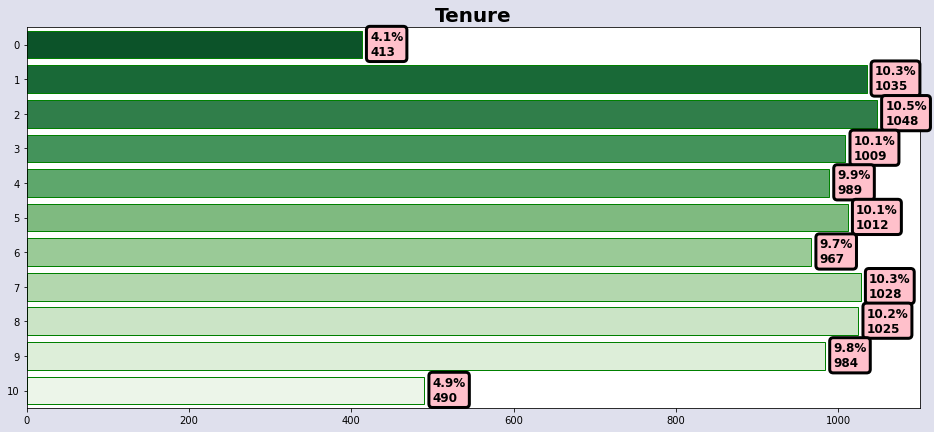

In [ ]:
bar_chart_bar('Tenure', 7)

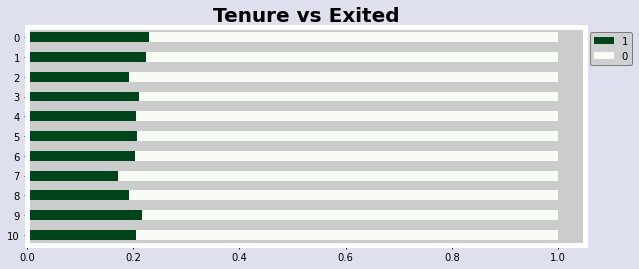

In [ ]:
stacked_plot("Tenure",4)

In [ ]:
cat_attr('Tenure')

Tenure     0      1      2      3      4      5      6      7      8      9      10
0       77.0%  77.6%  80.8%  78.9%  79.5%  79.3%  79.7%  82.8%  80.8%  78.4%  79.4%
1       23.0%  22.4%  19.2%  21.1%  20.5%  20.7%  20.3%  17.2%  19.2%  21.6%  20.6%




---


`INSIGHTS`

`Tenure` has a similar attrition rate for all 11 classes of this feature. There is not much correlation between this feature vs the other features of the dataset.


---





> #### **Observations on Balance**



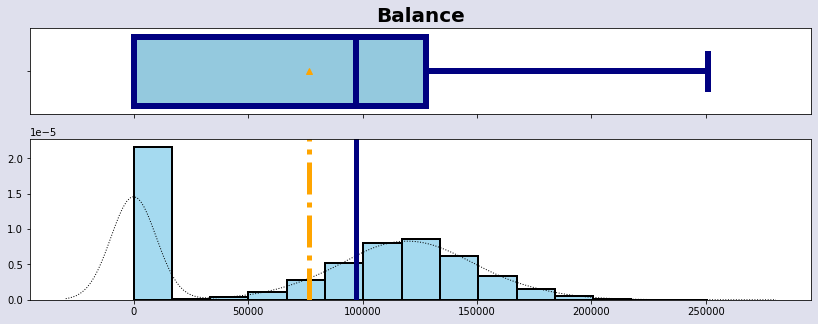

In [ ]:
histogram_boxplot(df['Balance'])


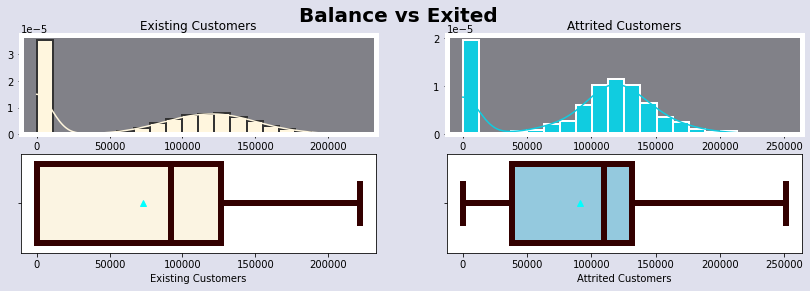

In [ ]:
plot('Balance')

In [ ]:
# Specified column stats on entire dataset
df['Balance'].describe()

count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
50%       97198.540000
75%      127644.240000
max      250898.090000
Name: Balance, dtype: float64

In [ ]:
# Specified column stats only on target class
df.EstimatedSalary[(df['Exited']==1)].describe(include='all').T

count      2037.000000
mean     101465.677531
std       57912.418071
min          11.580000
25%       51907.720000
50%      102460.840000
75%      152422.910000
max      199808.100000
Name: EstimatedSalary, dtype: float64



---
`INSIGHTS`

`Balance` has a right skewed distribution with no outliers. The IQR is in a higher range for the attrited class. *See figures above.*

This feature is a candidate for binning.


---






> #### **Observations on NumOfProducts**



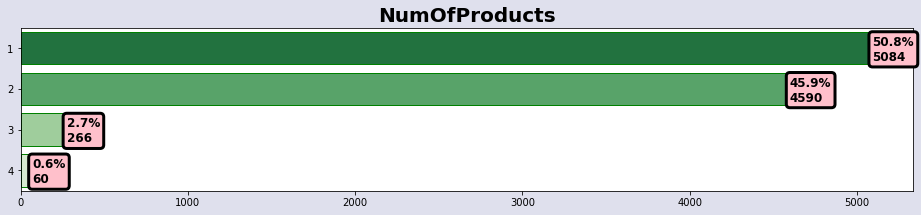

In [ ]:
bar_chart_bar('NumOfProducts', 3)

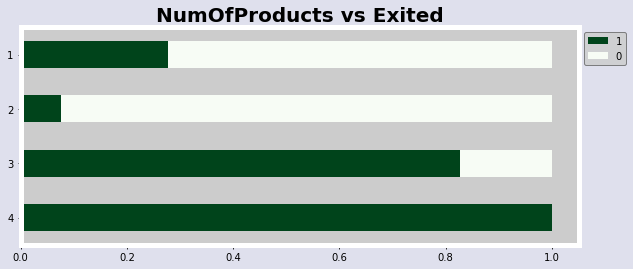

In [ ]:
stacked_plot("NumOfProducts",4)

In [ ]:
cat_attr('NumOfProducts')

NumOfProducts      1      2      3       4
0              72.3%  92.4%  17.3%    0.0%
1              27.7%   7.6%  82.7%  100.0%




---

`INSIGHTS`

Most customers only have 1 or 2 products. **Only 4% of customers have 2 or more products**

For the customers that do have more than 2 products, the atttrition rate increases. 83% of customers with 3 products churn. 

100% of customers with 4 products churn

---





> #### **Observations on HasCrCard**



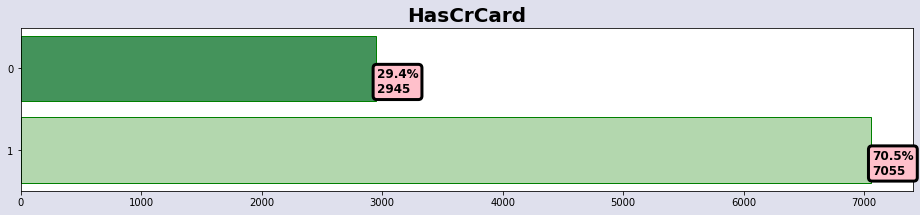

In [ ]:
bar_chart_bar('HasCrCard', 3)

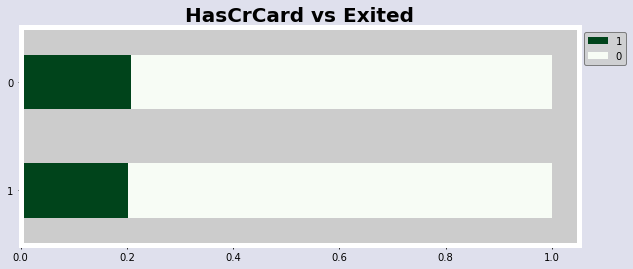

In [ ]:
stacked_plot("HasCrCard",4)

In [ ]:
cat_attr('HasCrCard')

HasCrCard      0      1
0          79.2%  79.8%
1          20.8%  20.2%




---


`INSIGHTS`

`HasCrCard` has only a miniscule correlation to the target feature as well as all of the other features in the dataset. The percentage of attrition with `HasCrCard` in the affirmative is 20.2%. Customers who are in the negative class for `HasCrCard` is 20.8%. This feature is a candidate for feature removal


---





> #### **Observations on IsActiveMember**



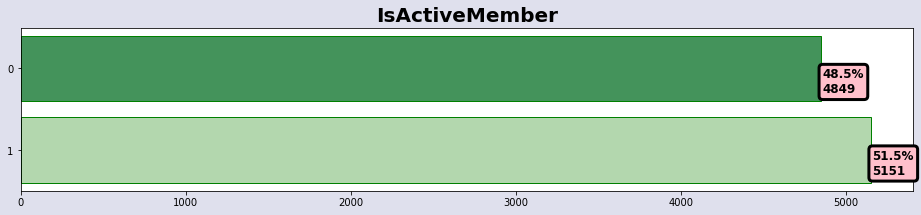

In [ ]:
bar_chart_bar('IsActiveMember', 3)

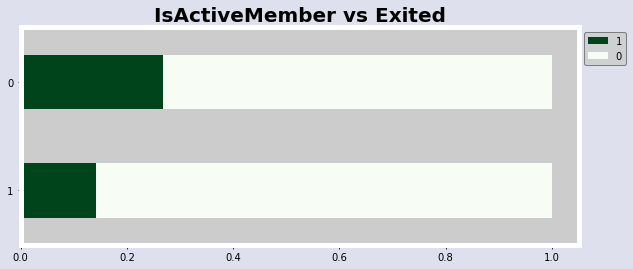

In [ ]:
stacked_plot("IsActiveMember",4)

In [ ]:
cat_attr('IsActiveMember')

IsActiveMember      0      1
0               73.1%  85.7%
1               26.9%  14.3%


---
`INSIGHTS`

`IsActiveMember` has 52% in the affirmative class. 

27% of Inactive members churn vs Active members at 14%. 


---





> #### **Observations on EstimatedSalary**



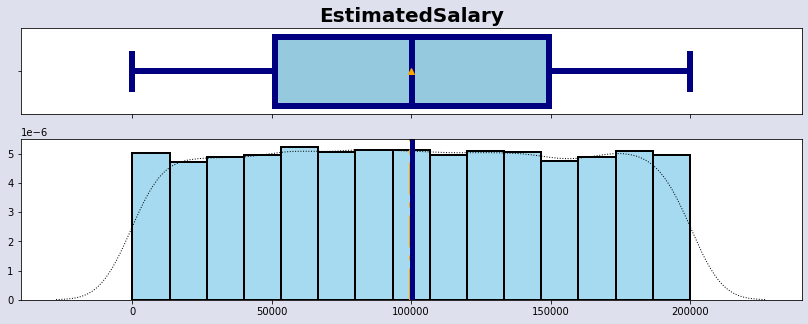

In [ ]:
histogram_boxplot(df['EstimatedSalary'])

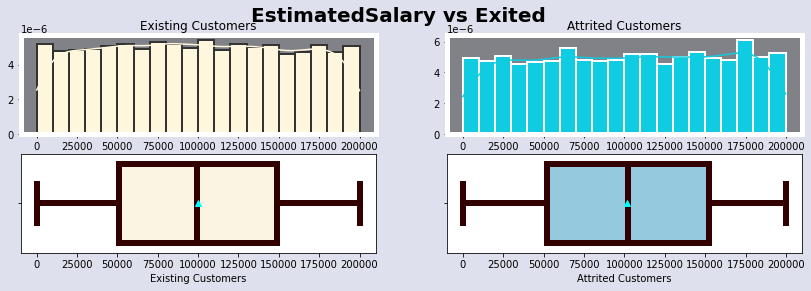

In [ ]:
plot('EstimatedSalary')

In [ ]:
# Specified column stats on entire dataset
df['EstimatedSalary'].describe()

count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: EstimatedSalary, dtype: float64

In [ ]:
# Specified column stats only on target class
df.EstimatedSalary[(df['Exited']==1)].describe(include='all')

count      2037.000000
mean     101465.677531
std       57912.418071
min          11.580000
25%       51907.720000
50%      102460.840000
75%      152422.910000
max      199808.100000
Name: EstimatedSalary, dtype: float64



---


`INSIGHTS`

`EstimatedSalary` is evenly distributed. A statistical summary shows that there isn't much different between the classes. This feature has an insignificant correlation to our target class.


---





> #### **MultiVariate**



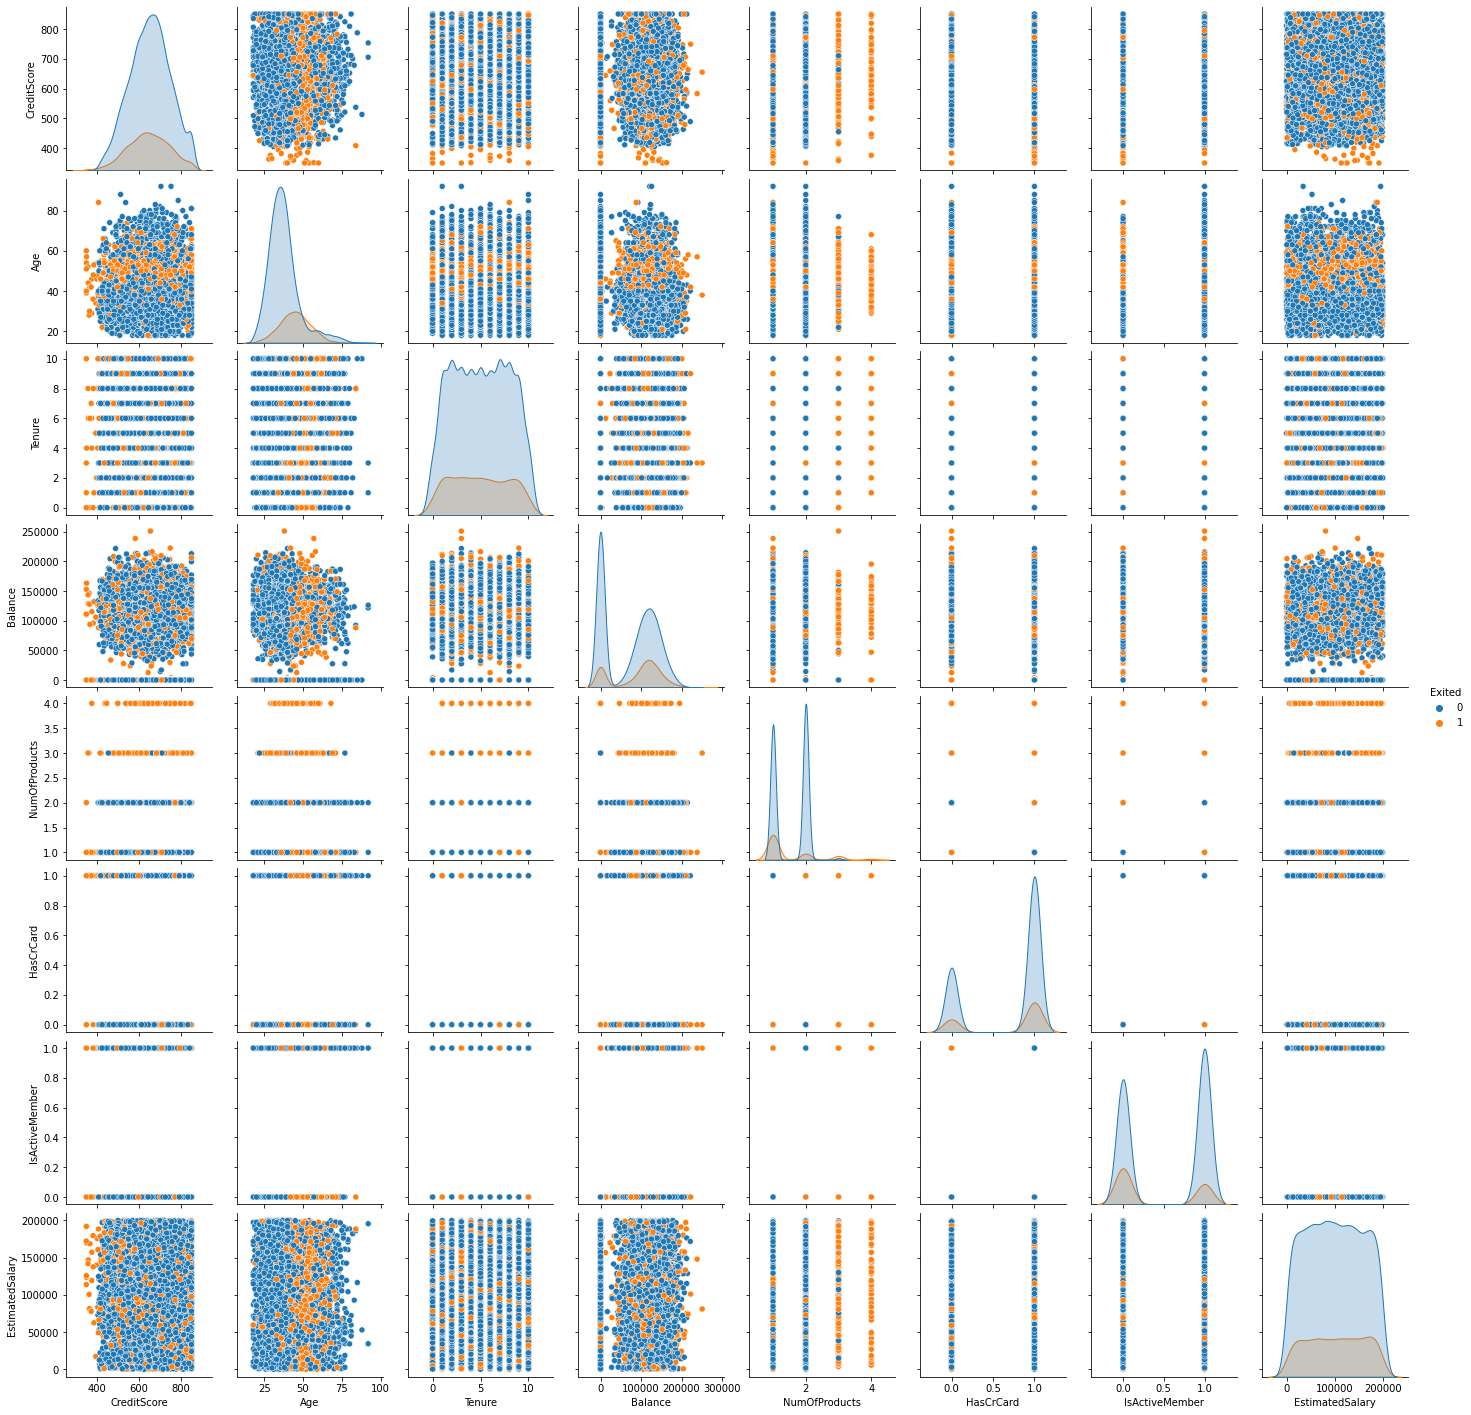

In [ ]:
#pairplot with hue as target feature
sns.pairplot(df, diag_kind="kde", hue="Exited")



---


`INSIGHTS`

The pairplot with the hue as the target feature shows that it will be difficult to separate the classes linearly for the continuous features.

---



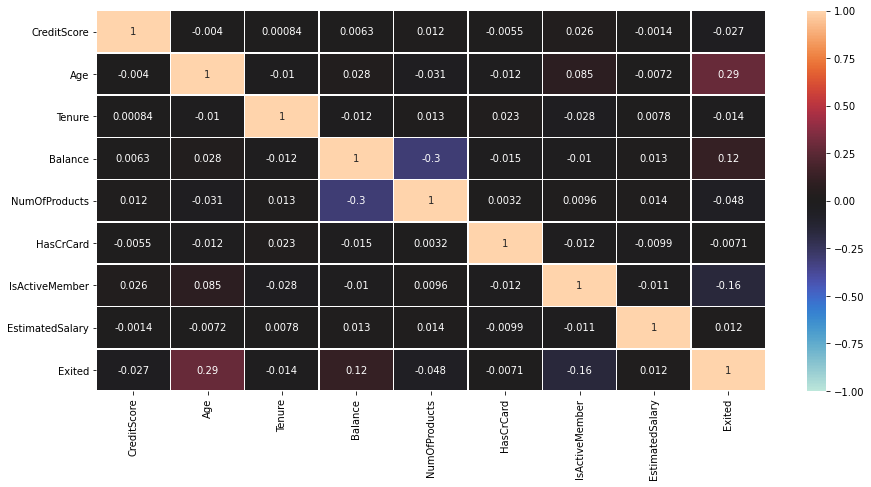

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.5,vmin=-1,vmax=1,center=0,cbar=True);



---


`INSIGHTS`

The heatmap shows that most of the features are not strongly correlated.

Age and Balance have a visible positive correlation to the target feature.

IsActiveMember has a mild negative correlation to the target feature.

Balance and Number of Products are negatively correlated.


---



> #### **Additional Customer Analysis and Characteristics**

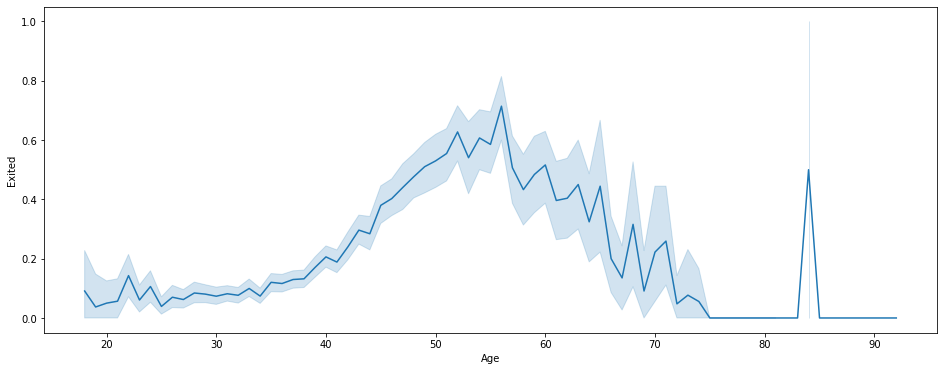

In [ ]:
# Another look at Age vs Exited
dims = (16, 6)
fig, ax = plt.subplots(figsize=dims)
sns.lineplot(x='Age',y='Exited',data=df);

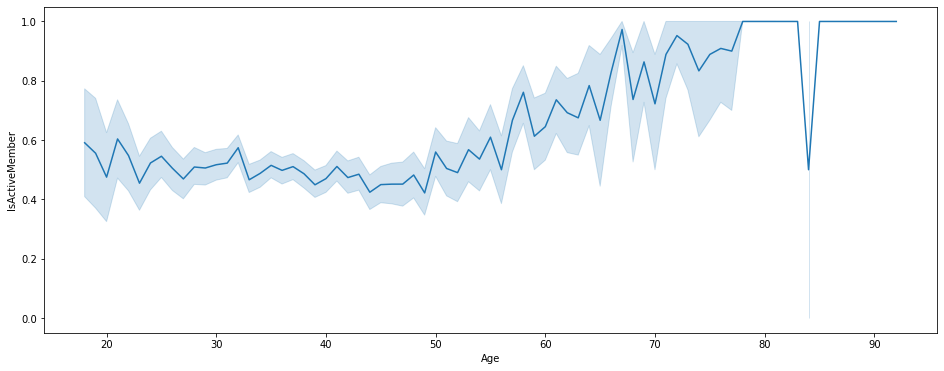

In [ ]:
# Age vs Active
dims = (16, 6)
fig, ax = plt.subplots(figsize=dims)
sns.lineplot(x='Age',y='IsActiveMember',data=df)

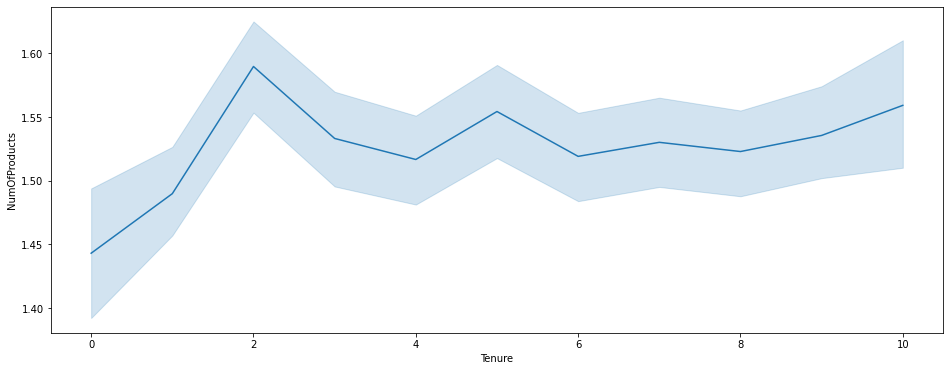

In [ ]:
# Tenure vs Number of Products
dims = (16, 6)
fig, ax = plt.subplots(figsize=dims)
sns.lineplot(x='Tenure',y='NumOfProducts',data=df)

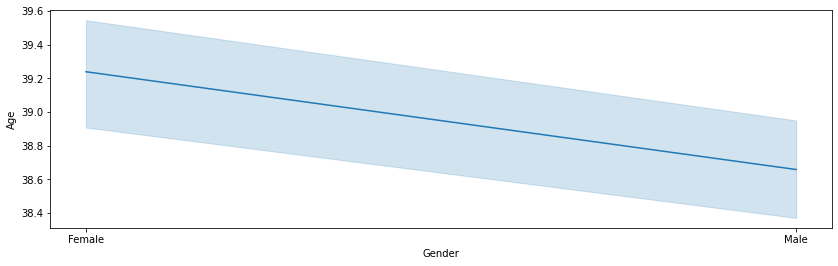

In [ ]:
# Gender and Age
dims = (14, 4);fig, ax = plt.subplots(figsize=dims)
sns.lineplot(x='Gender',y='Age', data=df);

In [ ]:
df.Age[(df['Gender']=='Female')].describe(include='all')

count    4543.000000
mean       39.238389
std        10.588588
min        18.000000
25%        32.000000
50%        38.000000
75%        45.000000
max        85.000000
Name: Age, dtype: float64

In [ ]:
df.Age[(df['Gender']=='Male')].describe(include='all')

count    5457.000000
mean       38.658237
std        10.396780
min        18.000000
25%        32.000000
50%        37.000000
75%        43.000000
max        92.000000
Name: Age, dtype: float64

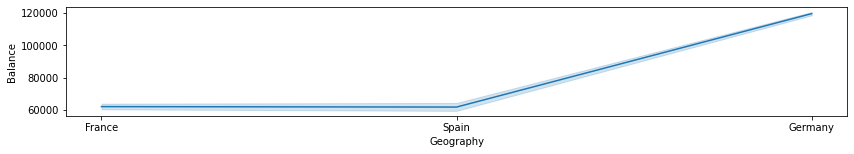

In [ ]:
# Geography and Balance
dims = (14, 2);fig, ax = plt.subplots(figsize=dims)
sns.lineplot(x='Geography',y='Balance', data=df);

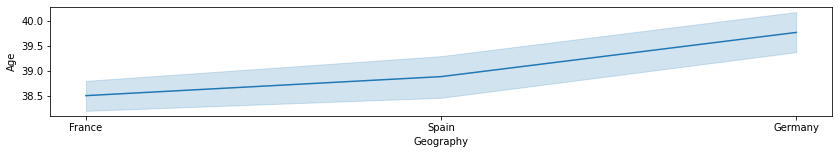

In [ ]:
# Geography and Age
dims = (14, 2);fig, ax = plt.subplots(figsize=dims)
sns.lineplot(x='Geography',y='Age',data=df);

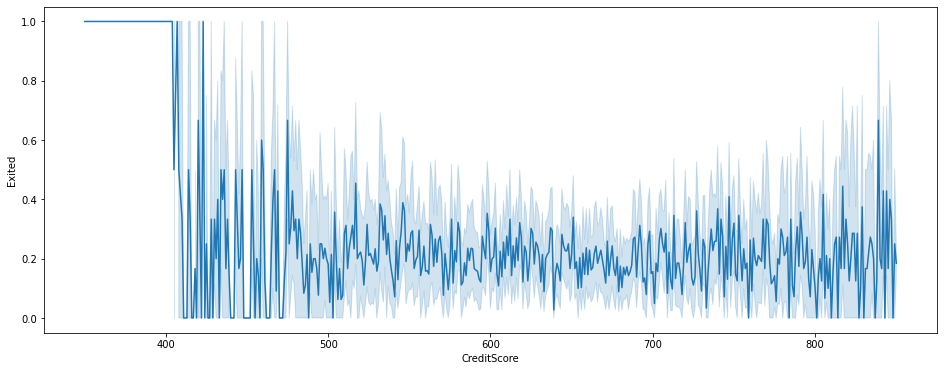

In [ ]:
# Another look at CreditScore vs Exited
dims = (16, 6)
fig, ax = plt.subplots(figsize=dims)
sns.lineplot(x='CreditScore',y='Exited',data=df)



---


`CUSTOMER CHARACTERISTICS`

> - The churn rate is in an upward trend for customers between the ages of 25 to 57. For customers in their mid-50's plus, the churn rate declines.

> - From the ages of 50 to 80, the more likely a customer is to remain an active customer. From the ages of 32 to 50, the customer is more likely to become inactive.

> - Once the Tenure rate reaches 2, the rate of increase for Number of Prodcts stalls

> - Female customers are 1 year older than Male Customers on Average.

> - German customers have a higher balance on Average.

> - German customers are 1 year older than Spain or France on Average.

> - The likelihood of churn increases at the low end of the CreditScore. Customers with a lower credit score are more likey to churn even though the feature as a whole is not strongly correlated to the target feature.


---



# **Data Pre-Processing**



> ### **Outlier Treatment**



`CreditScore` and `Age` have outliers. These outliers do not appear to be errors. These appear to be a valid representation of the population. Therefore, these outliers will not be treated.



> ### **Missing Value Treatment**



There are no missing values to impute

> ### **Binning**

`Balance` has a binomial distribution due to many customers with a balance of 0.
Earlier binning attempts were made but binning had an overall negative effect on model performace. Therefore, we will not be using the binning technique.



> ### **Column Drops**



In [ ]:
#dropping columns that are not relevant
df.drop(['Surname','Tenure', 'HasCrCard', 'EstimatedSalary'],axis=1,inplace=True)
print(df.shape)
print(df.columns)

(10000, 8)
Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Balance', 'NumOfProducts',
       'IsActiveMember', 'Exited'],
      dtype='object')


In [ ]:
# sanity check
df.head()

,CreditScore,Geography,Gender,Age,Balance,NumOfProducts,IsActiveMember,Exited
0,619,France,Female,42,0.00,1,1,1
1,608,Spain,Female,41,83807.86,1,1,0
2,502,France,Female,42,159660.80,3,0,1
3,699,France,Female,39,0.00,2,0,0
4,850,Spain,Female,43,125510.82,1,1,0


We removed `Surname`,`Tenure`,`HasCrCard`,`EstimatedSalary` due to low correlation between the target feature. Previous model tests with these features included were conducted in an earlier version of this notebook. Model performance suffered when these features were included in the dataset. Therfore, we will remove them.

> ### **Split the Data**

In [ ]:
# Separating target variable from the independent variables
X = df.drop(columns="Exited")
y = df["Exited"]

In [ ]:
X=pd.get_dummies(X,drop_first=True)

In [ ]:
X.shape, y.shape

((10000, 8), (10000,))

In [ ]:
# Splitting into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1,stratify=y)
print(X_train.shape, X_test.shape)

(7000, 8) (3000, 8)


> ### **Scaling**

In [ ]:
col_names = ['CreditScore', 'Age', 'Balance', 'NumOfProducts']
#col_names = ['Age', 'Balance']
features = X_train[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
X_train[col_names] = features

In [ ]:
col_names = ['CreditScore', 'Age', 'Balance', 'NumOfProducts']
#col_names = ['Age', 'Balance']
features = X_test[col_names]
scaler = StandardScaler().fit(features.values)
features = scaler.transform(features.values)
X_test[col_names] = features

In [ ]:
# sanity check
X_train.head(1)


,CreditScore,Age,Balance,NumOfProducts,IsActiveMember,Geography_Germany,Geography_Spain,Gender_Male
7635,-1.38548,-0.93892,0.460208,-0.918448,0,0,0,0


In [ ]:
# sanity check
X_test.head(1)

,CreditScore,Age,Balance,NumOfProducts,IsActiveMember,Geography_Germany,Geography_Spain,Gender_Male
6973,0.078932,0.008423,0.469223,0.85401,1,1,0,1


We tried MinMaxScaler() and normalize() from sklearn in older versions of this notebook. StandardScaler() yields the best results.



> ### **Over Sampling / Under Sampling and Class Weights**



In [ ]:
display(HTML('''<hr/>'''))
print("Before UpSampling, counts of label 'Yes': {}".format(sum(y_train==1)))
print("Before UpSampling, counts of label 'No': {} \n".format(sum(y_train==0)))

sm = SMOTE(sampling_strategy = 1 ,k_neighbors = 5, random_state=1)   #Synthetic Minority Over Sampling Technique
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)


print("After UpSampling, counts of label 'Yes': {}".format(sum(y_train_over==1)))
print("After UpSampling, counts of label 'No': {} \n".format(sum(y_train_over==0)))


print('After UpSampling, the shape of train_X: {}'.format(X_train_over.shape))
print('After UpSampling, the shape of train_y: {} \n'.format(y_train_over.shape))

display(HTML('''<hr/>'''))

print("Before DownSampling, counts of label 'Yes': {}".format(sum(y_train==1)))
print("Before DownSampling, counts of label 'No': {} \n".format(sum(y_train==0)))


cc = ClusterCentroids(random_state=4)
X_train_under, y_train_under = cc.fit_sample(X_train, y_train)


print("After DownSampling, counts of label 'Yes': {}".format(sum(y_train_under==1)))
print("After DownSampling, counts of label 'No': {} \n".format(sum(y_train_under==0)))


print('After DownSampling, the shape of train_X: {}'.format(X_train_under.shape))
print('After DownSampling, the shape of train_y: {} \n'.format(y_train_under.shape))


Before UpSampling, counts of label 'Yes': 1426
Before UpSampling, counts of label 'No': 5574 

After UpSampling, counts of label 'Yes': 5574
After UpSampling, counts of label 'No': 5574 

After UpSampling, the shape of train_X: (11148, 8)
After UpSampling, the shape of train_y: (11148,) 



Before DownSampling, counts of label 'Yes': 1426
Before DownSampling, counts of label 'No': 5574 

After DownSampling, counts of label 'Yes': 1426
After DownSampling, counts of label 'No': 1426 

After DownSampling, the shape of train_X: (2852, 8)
After DownSampling, the shape of train_y: (2852,) 



Creating OverSampled and UnderSampled versions of our training set. We can substitute these in place of the original if needed during model improvement

In [ ]:
class_weights = {0:1, 1:10}

Also using class_weights to compensate for our imbalanced target feature (80/20)

# Model evaluation criterion:

#### Model can make wrong predictions as:
1. Predicting a customer will leave credit card services BUT the customer doesn't leave - Loss of resources
2. Predicting a customer will NOT leave credit card services BUT the customer does leave - Loss of opportunity

#### Which case is more important? 
* Predicting that a customer will NOT leave credit card services BUT the customer does leave i.e. losing on a potential source of income for the company because that customer will not be targeted by the customer support team when he should be targeted.

#### How to reduce this loss i.e need to reduce False Negatives?
* Banks that provide services and are worried about churn need `Recall` to be maximized, greater the Recall, the lesser the chances of false negatives.

# **Model Building and Performance Improvement**

###### Confusion Matrix formatting

In [ ]:
# This function will plot an sklearn Confusion Matrix
def make_confusion_matrix(cf,group_names=None,categories='auto',count=True,percent=True,cbar=True,xyticks=True,xyplotlabels=True,sum_stats=True,figsize=None,cmap='Blues',title=None):
    
    blanks = ['' for i in range(cf.size)]
    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks
    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks
    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])

    # SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""

    # FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False

    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

###### Model A

In [ ]:
model_A = Sequential()
model_A.add(Dense(2, input_shape = (8,), activation='tanh'))
model_A.add(Dense(4, activation='tanh'))
model_A.add(Dense(1, activation='sigmoid'))

optimizer = keras.optimizers.Adam(lr=0.005)
model_A.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model_A.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 2)                 18        
_________________________________________________________________
dense_19 (Dense)             (None, 4)                 12        
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 5         
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


In [ ]:
historyA=model_A.fit(X_train,y_train, batch_size=200, epochs=15, class_weight=class_weights, validation_split=0.2)


Epoch 1/15
28/28 [==============================] - 0s 3ms/step - loss: 1.3661 - accuracy: 0.5505 - val_loss: 0.8421 - val_accuracy: 0.5571
Epoch 2/15
28/28 [==============================] - 0s 2ms/step - loss: 1.3618 - accuracy: 0.5634 - val_loss: 0.8254 - val_accuracy: 0.5700
Epoch 3/15
28/28 [==============================] - 0s 2ms/step - loss: 1.3592 - accuracy: 0.5387 - val_loss: 0.8016 - val_accuracy: 0.5814
Epoch 4/15
28/28 [==============================] - 0s 3ms/step - loss: 1.3555 - accuracy: 0.5634 - val_loss: 0.8128 - val_accuracy: 0.5800
Epoch 5/15
28/28 [==============================] - 0s 2ms/step - loss: 1.3519 - accuracy: 0.5638 - val_loss: 0.8034 - val_accuracy: 0.5836
Epoch 6/15
28/28 [==============================] - 0s 2ms/step - loss: 1.3481 - accuracy: 0.5509 - val_loss: 0.7897 - val_accuracy: 0.5914
Epoch 7/15
28/28 [==============================] - 0s 2ms/step - loss: 1.3415 - accuracy: 0.5709 - val_loss: 0.8282 - val_accuracy: 0.5671
Epoch 8/15
28/28 [==

In [ ]:
Y_pred_cls = model_A.predict_classes(X_test, batch_size=200, verbose=0)
A_accuracy = str(model_A.evaluate(X_test,y_test.values)[1])
A_precision = str(precision_score(y_test.values, Y_pred_cls))
A_recall =  str(recall_score(y_test.values,Y_pred_cls))
A_f1 = str(f1_score(y_test.values,Y_pred_cls))

94/94 [==============================] - 0s 1ms/step - loss: 0.7406 - accuracy: 0.6133


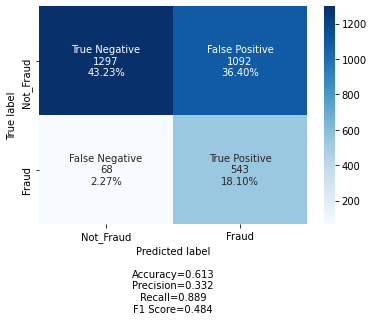

In [ ]:
## Confusion Matrix on test set
import seaborn as sn
y_pred1 = model_A.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0
        
cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Fraud','Fraud']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

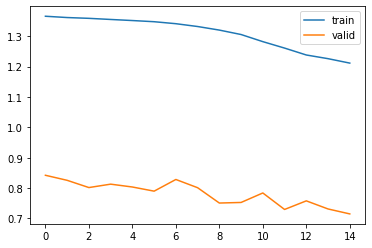

In [ ]:
# Capturing learning history per epoch
hist  = pd.DataFrame(historyA.history)
hist['epoch'] = historyA.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

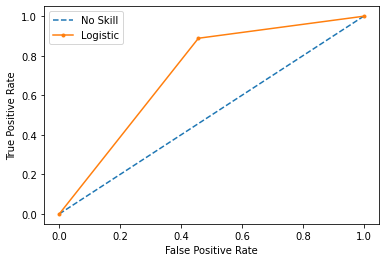

In [ ]:
# ROC Curve
yhat = model_A.predict_proba(X_test)

yhat = np.around(yhat, decimals=0, out=None).flatten().astype(int)
yhat = pd.Series(yhat)

fpr, tpr, thresholds = roc_curve(y_test, yhat)
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()



---


**Model_A** is a simple configuration with an input layer, a hidden layer with 4 neurons using tanh as an activation function and an output layer. The Recall *(our metric of concern)* is good at 89%, but the other metrics (Precision, Accuracy and F1) could improve. We should try to improve the overall balance of the model while maintaining an acceptable recall


---



###### Model B

In [ ]:
model_B = Sequential()
model_B.add(Dense(2, input_shape = (8,), activation='tanh'))
model_B.add(Dense(2, activation='tanh'))
model_B.add(Dense(1, activation='sigmoid'))

optimizer = keras.optimizers.Adam(lr=0.005)
model_B.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model_B.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_24 (Dense)             (None, 2)                 18        
_________________________________________________________________
dense_25 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_26 (Dense)             (None, 1)                 3         
Total params: 27
Trainable params: 27
Non-trainable params: 0
_________________________________________________________________


In [ ]:
historyB=model_B.fit(X_train,y_train, batch_size=200, epochs=15, class_weight=class_weights, validation_split=0.2)

Epoch 1/15
28/28 [==============================] - 1s 11ms/step - loss: 1.6436 - accuracy: 0.4504 - val_loss: 0.8484 - val_accuracy: 0.4386
Epoch 2/15
28/28 [==============================] - 0s 2ms/step - loss: 1.5716 - accuracy: 0.4131 - val_loss: 0.8394 - val_accuracy: 0.4914
Epoch 3/15
28/28 [==============================] - 0s 2ms/step - loss: 1.4918 - accuracy: 0.4995 - val_loss: 0.8129 - val_accuracy: 0.5471
Epoch 4/15
28/28 [==============================] - 0s 3ms/step - loss: 1.4508 - accuracy: 0.5322 - val_loss: 0.8156 - val_accuracy: 0.5636
Epoch 5/15
28/28 [==============================] - 0s 2ms/step - loss: 1.4070 - accuracy: 0.5454 - val_loss: 0.8131 - val_accuracy: 0.5650
Epoch 6/15
28/28 [==============================] - 0s 2ms/step - loss: 1.4084 - accuracy: 0.5554 - val_loss: 0.8127 - val_accuracy: 0.5693
Epoch 7/15
28/28 [==============================] - 0s 2ms/step - loss: 1.4052 - accuracy: 0.5499 - val_loss: 0.7979 - val_accuracy: 0.5757
Epoch 8/15
28/28 [=

In [ ]:
Y_pred_cls = model_B.predict_classes(X_test, batch_size=200, verbose=0)
B_accuracy = str(model_B.evaluate(X_test,y_test.values)[1])
B_precision = str(precision_score(y_test.values, Y_pred_cls))
B_recall =  str(recall_score(y_test.values,Y_pred_cls))
B_f1 = str(f1_score(y_test.values,Y_pred_cls))

94/94 [==============================] - 0s 1ms/step - loss: 0.8004 - accuracy: 0.5633


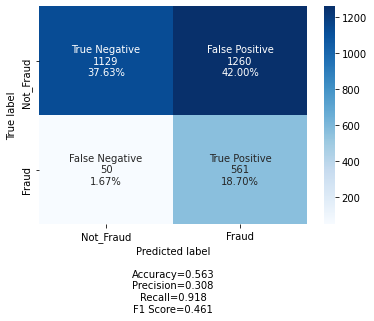

In [ ]:
## Confusion Matrix on test set
y_pred1 = model_B.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0
        
cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Fraud','Fraud']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

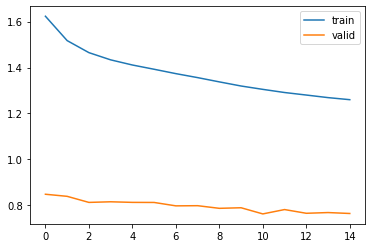

In [ ]:
# Capturing learning history per epoch
hist  = pd.DataFrame(historyB.history)
hist['epoch'] = historyB.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

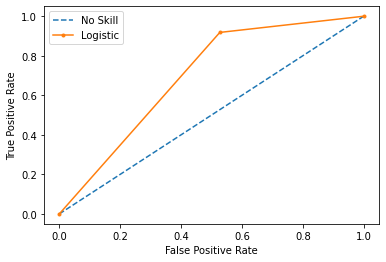

In [ ]:
# ROC Curve
yhat = model_B.predict_proba(X_test)

yhat = np.around(yhat, decimals=0, out=None).flatten().astype(int)
yhat = pd.Series(yhat)

fpr, tpr, thresholds = roc_curve(y_test, yhat)
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()



---


In `Model_B` we reduced the number of neurons in the hidden layer to 2. This pushed recall above 91% - but the other metrics declined respectively. We are improving recall. We're catching more customers who will churn but our False Positive rate is also increasing. Thus, we are not improving the overall balacne in the model.


---



###### Model C

In [ ]:
model_C = Sequential()
model_C.add(Dense(2, input_shape = (8,), activation='tanh'))
model_C.add(Dense(2, activation='tanh'))
model_C.add(Dense(2, activation='sigmoid'))
model_C.add(Dense(2, activation='tanh'))
model_C.add(Dense(1, activation='sigmoid'))

optimizer = keras.optimizers.Adam(lr=0.005)
model_C.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model_C.summary()

Model: "sequential_19"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_54 (Dense)             (None, 2)                 18        
_________________________________________________________________
dense_55 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_56 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_57 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_58 (Dense)             (None, 1)                 3         
Total params: 39
Trainable params: 39
Non-trainable params: 0
_________________________________________________________________


In [ ]:
historyC=model_C.fit(X_train,y_train, batch_size=200, epochs=15, validation_split=0.2)

Epoch 1/15
28/28 [==============================] - 1s 12ms/step - loss: 0.5187 - accuracy: 0.8054 - val_loss: 0.5087 - val_accuracy: 0.7807
Epoch 2/15
28/28 [==============================] - 0s 2ms/step - loss: 0.4805 - accuracy: 0.8008 - val_loss: 0.4955 - val_accuracy: 0.7807
Epoch 3/15
28/28 [==============================] - 0s 2ms/step - loss: 0.4669 - accuracy: 0.7991 - val_loss: 0.4756 - val_accuracy: 0.7807
Epoch 4/15
28/28 [==============================] - 0s 2ms/step - loss: 0.4498 - accuracy: 0.8005 - val_loss: 0.4593 - val_accuracy: 0.7807
Epoch 5/15
28/28 [==============================] - 0s 2ms/step - loss: 0.4315 - accuracy: 0.8031 - val_loss: 0.4483 - val_accuracy: 0.7807
Epoch 6/15
28/28 [==============================] - 0s 2ms/step - loss: 0.4305 - accuracy: 0.7913 - val_loss: 0.4394 - val_accuracy: 0.7807
Epoch 7/15
28/28 [==============================] - 0s 2ms/step - loss: 0.4111 - accuracy: 0.8060 - val_loss: 0.4312 - val_accuracy: 0.7807
Epoch 8/15
28/28 [=

In [ ]:
Y_pred_cls = model_C.predict_classes(X_test, batch_size=200, verbose=0)
C_accuracy = str(model_C.evaluate(X_test,y_test.values)[1])
C_precision = str(precision_score(y_test.values, Y_pred_cls))
C_recall =  str(recall_score(y_test.values,Y_pred_cls))
C_f1 = str(f1_score(y_test.values,Y_pred_cls))

94/94 [==============================] - 0s 1ms/step - loss: 0.3855 - accuracy: 0.8400


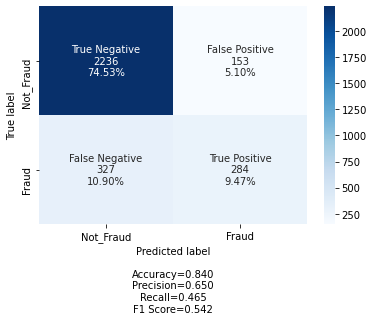

In [ ]:
## Confusion Matrix on test set
y_pred1 = model_C.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0
        
cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Fraud','Fraud']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

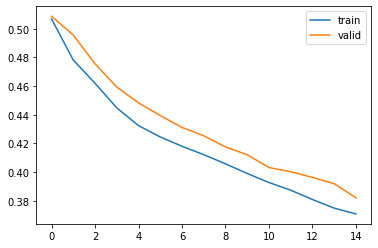

In [ ]:
# Capturing learning history per epoch
hist  = pd.DataFrame(historyC.history)
hist['epoch'] = historyC.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

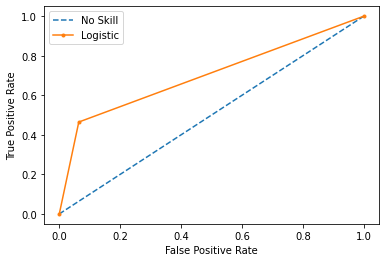

In [ ]:
# ROC Curve
yhat = model_C.predict_proba(X_test)

yhat = np.around(yhat, decimals=0, out=None).flatten().astype(int)
yhat = pd.Series(yhat)

fpr, tpr, thresholds = roc_curve(y_test, yhat)
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()



---

In `Model_C` we added a few hidden layers with a low number of neurons using sigmoid and tanh activation functions. Removed class weights for more balance. This imporoved the other metrics, reducing false positives significantly, but our metric of concern (recall) took a hit and is now below 50%. This is not acceptable.


---



###### Model D

In [ ]:
class_weights = {0:2, 1:8}

In [ ]:
model_D = Sequential()
model_D.add(Dense(2, input_shape = (8,), activation='tanh'))
model_D.add(Dense(4, activation='tanh'))
model_D.add(Dense(1, activation='sigmoid'))

optimizer = keras.optimizers.Adam(lr=0.005)
model_D.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model_D.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_65 (Dense)             (None, 2)                 18        
_________________________________________________________________
dense_66 (Dense)             (None, 4)                 12        
_________________________________________________________________
dense_67 (Dense)             (None, 1)                 5         
Total params: 35
Trainable params: 35
Non-trainable params: 0
_________________________________________________________________


In [ ]:
historyD=model_D.fit(X_train,y_train, batch_size=200, epochs=15, class_weight=class_weights, validation_split=0.2)

Epoch 1/15
28/28 [==============================] - 0s 4ms/step - loss: 1.7835 - accuracy: 0.7100 - val_loss: 0.5458 - val_accuracy: 0.7157
Epoch 2/15
28/28 [==============================] - 0s 2ms/step - loss: 1.7834 - accuracy: 0.7157 - val_loss: 0.5468 - val_accuracy: 0.7136
Epoch 3/15
28/28 [==============================] - 0s 2ms/step - loss: 1.7805 - accuracy: 0.7116 - val_loss: 0.5428 - val_accuracy: 0.7186
Epoch 4/15
28/28 [==============================] - 0s 2ms/step - loss: 1.7800 - accuracy: 0.7120 - val_loss: 0.5577 - val_accuracy: 0.7050
Epoch 5/15
28/28 [==============================] - 0s 2ms/step - loss: 1.7774 - accuracy: 0.7198 - val_loss: 0.5464 - val_accuracy: 0.7129
Epoch 6/15
28/28 [==============================] - 0s 2ms/step - loss: 1.7751 - accuracy: 0.7063 - val_loss: 0.5342 - val_accuracy: 0.7236
Epoch 7/15
28/28 [==============================] - 0s 2ms/step - loss: 1.7711 - accuracy: 0.7191 - val_loss: 0.5556 - val_accuracy: 0.7021
Epoch 8/15
28/28 [==

In [ ]:
Y_pred_cls = model_D.predict_classes(X_test, batch_size=200, verbose=0)
D_accuracy = str(model_D.evaluate(X_test,y_test.values)[1])
D_precision = str(precision_score(y_test.values, Y_pred_cls))
D_recall =  str(recall_score(y_test.values,Y_pred_cls))
D_f1 = str(f1_score(y_test.values,Y_pred_cls))

94/94 [==============================] - 0s 1ms/step - loss: 0.5353 - accuracy: 0.7213


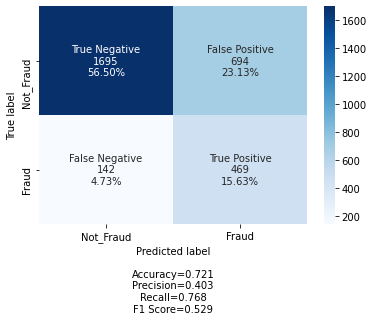

In [ ]:
## Confusion Matrix on test set
y_pred1 = model_D.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0
        
cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Fraud','Fraud']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

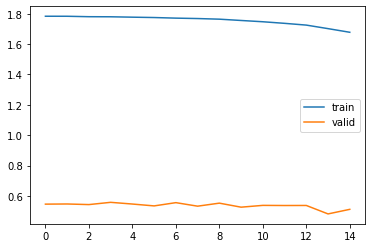

In [ ]:
# Capturing learning history per epoch
hist  = pd.DataFrame(historyD.history)
hist['epoch'] = historyD.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

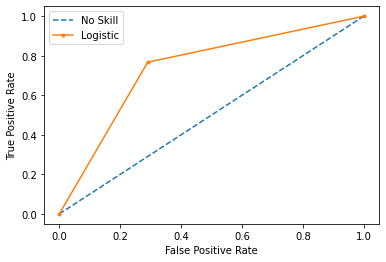

In [ ]:
# ROC Curve
yhat = model_D.predict_proba(X_test)

yhat = np.around(yhat, decimals=0, out=None).flatten().astype(int)
yhat = pd.Series(yhat)

fpr, tpr, thresholds = roc_curve(y_test, yhat)
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()



---

For `Model_D` we modified the class weights and added a few neurons in the hidden layers. This reduced our false positives while maintaining a recall rate that may be acceptable to the stake holder. This is the most balanced model.


---



###### Model E

In [ ]:
#adding earlystopping callback
es= keras.callbacks.EarlyStopping(monitor='val_loss',
                              min_delta=0,
                              patience=10,
 
                             verbose=0, mode='min', restore_best_weights= True)
model_E = Sequential()
#Initializing the weights uisng hue_normal 
model_E.add(Dense(2, input_shape=(8,), kernel_initializer='he_normal', activation='tanh'))
#model_E.add(Dropout(0.2))

model_E.add(Dense(2, kernel_initializer='he_normal', activation='tanh'))
model_E.add(Dropout(0.2))
model_E.add(Dense(1, kernel_initializer='he_normal', activation='sigmoid'))

model_E.compile(Adam(lr=0.01), loss='binary_crossentropy', metrics=['accuracy'])
    
#his_mod2= Model2.fit(X_train, y_train, validation_split=0.2, batch_size=700, epochs=40, callbacks=[es], shuffle=True, verbose=1)

In [ ]:
model_E.summary()

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_120 (Dense)            (None, 2)                 18        
_________________________________________________________________
dense_121 (Dense)            (None, 2)                 6         
_________________________________________________________________
dropout_18 (Dropout)         (None, 2)                 0         
_________________________________________________________________
dense_122 (Dense)            (None, 1)                 3         
Total params: 27
Trainable params: 27
Non-trainable params: 0
_________________________________________________________________


In [ ]:
historyE=model_E.fit(X_train_over,y_train_over, batch_size=200, epochs=15, callbacks=[es], validation_split=0.2, shuffle=True)

Epoch 1/15
45/45 [==============================] - 1s 7ms/step - loss: 0.6612 - accuracy: 0.6192 - val_loss: 0.9300 - val_accuracy: 0.4090
Epoch 2/15
45/45 [==============================] - 0s 2ms/step - loss: 0.5948 - accuracy: 0.7131 - val_loss: 0.7633 - val_accuracy: 0.5305
Epoch 3/15
45/45 [==============================] - 0s 2ms/step - loss: 0.5596 - accuracy: 0.7145 - val_loss: 0.7314 - val_accuracy: 0.5193
Epoch 4/15
45/45 [==============================] - 0s 1ms/step - loss: 0.5378 - accuracy: 0.7170 - val_loss: 0.7056 - val_accuracy: 0.6395
Epoch 5/15
45/45 [==============================] - 0s 2ms/step - loss: 0.5176 - accuracy: 0.7477 - val_loss: 0.6909 - val_accuracy: 0.6520
Epoch 6/15
45/45 [==============================] - 0s 1ms/step - loss: 0.5103 - accuracy: 0.7482 - val_loss: 0.6905 - val_accuracy: 0.6570
Epoch 7/15
45/45 [==============================] - 0s 1ms/step - loss: 0.5010 - accuracy: 0.7542 - val_loss: 0.6762 - val_accuracy: 0.6601
Epoch 8/15
45/45 [==

In [ ]:
Y_pred_cls = model_E.predict_classes(X_test, batch_size=200, verbose=0)
E_accuracy = str(model_E.evaluate(X_test,y_test.values)[1])
E_precision = str(precision_score(y_test.values, Y_pred_cls))
E_recall =  str(recall_score(y_test.values,Y_pred_cls))
E_f1 = str(f1_score(y_test.values,Y_pred_cls))

94/94 [==============================] - 0s 1ms/step - loss: 0.4470 - accuracy: 0.7870


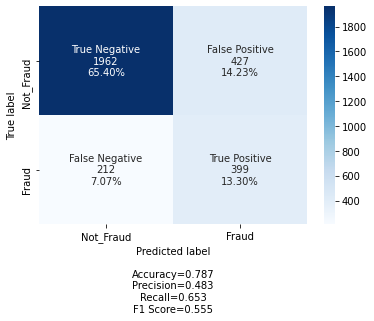

In [ ]:
## Confusion Matrix on test set
y_pred1 = model_E.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0
        
cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Fraud','Fraud']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

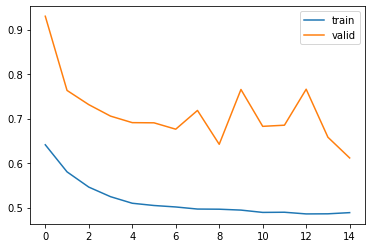

In [ ]:
# Capturing learning history per epoch
hist  = pd.DataFrame(historyE.history)
hist['epoch'] = historyE.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

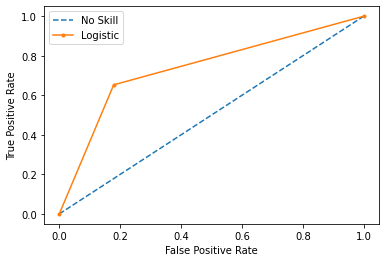

In [ ]:
# ROC Curve
yhat = model_E.predict_proba(X_test)

yhat = np.around(yhat, decimals=0, out=None).flatten().astype(int)
yhat = pd.Series(yhat)

fpr, tpr, thresholds = roc_curve(y_test, yhat)
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()



---

In `Model_E` we implemeted Early Stopping callback with DropOut techniques included. The learning rate was also increased to .01. This is a balanced model. I'm not satisfied with the recall for this model.


---



###### Model X

In [ ]:
class_weights = {0:1, 1:10}

In [ ]:
model_X = Sequential()
model_X.add(Dense(2, input_shape = (8,), activation='tanh'))
model_X.add(Dense(8, activation='tanh'))
model_X.add(Dropout(0.2))
model_X.add(Dense(2, activation='sigmoid'))
model_X.add(Dense(1, activation='sigmoid'))

optimizer = keras.optimizers.Adam(lr=0.005)
model_X.compile(optimizer=optimizer,loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model_X.summary()

Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_143 (Dense)            (None, 2)                 18        
_________________________________________________________________
dense_144 (Dense)            (None, 8)                 24        
_________________________________________________________________
dropout_23 (Dropout)         (None, 8)                 0         
_________________________________________________________________
dense_145 (Dense)            (None, 2)                 18        
_________________________________________________________________
dense_146 (Dense)            (None, 1)                 3         
Total params: 63
Trainable params: 63
Non-trainable params: 0
_________________________________________________________________


In [ ]:
historyX=model_X.fit(X_train,y_train, batch_size=1000, epochs=15, class_weight=class_weights, validation_split=0.2)

Epoch 1/15
6/6 [==============================] - 0s 14ms/step - loss: 1.3496 - accuracy: 0.5664 - val_loss: 0.8238 - val_accuracy: 0.5871
Epoch 2/15
6/6 [==============================] - 0s 6ms/step - loss: 1.3394 - accuracy: 0.5704 - val_loss: 0.8205 - val_accuracy: 0.5950
Epoch 3/15
6/6 [==============================] - 0s 6ms/step - loss: 1.3317 - accuracy: 0.5830 - val_loss: 0.8131 - val_accuracy: 0.6007
Epoch 4/15
6/6 [==============================] - 0s 6ms/step - loss: 1.3172 - accuracy: 0.5920 - val_loss: 0.8040 - val_accuracy: 0.6121
Epoch 5/15
6/6 [==============================] - 0s 5ms/step - loss: 1.3093 - accuracy: 0.6018 - val_loss: 0.7970 - val_accuracy: 0.6114
Epoch 6/15
6/6 [==============================] - 0s 6ms/step - loss: 1.3027 - accuracy: 0.6162 - val_loss: 0.7817 - val_accuracy: 0.6279
Epoch 7/15
6/6 [==============================] - 0s 5ms/step - loss: 1.2908 - accuracy: 0.6282 - val_loss: 0.7846 - val_accuracy: 0.6293
Epoch 8/15
6/6 [=================

In [ ]:
Y_pred_cls = model_X.predict_classes(X_test, batch_size=1000, verbose=0)
X_accuracy = str(model_X.evaluate(X_test,y_test.values)[1])
X_precision = str(precision_score(y_test.values, Y_pred_cls))
X_recall =  str(recall_score(y_test.values,Y_pred_cls))
X_f1 = str(f1_score(y_test.values,Y_pred_cls))

94/94 [==============================] - 0s 882us/step - loss: 0.7811 - accuracy: 0.6517


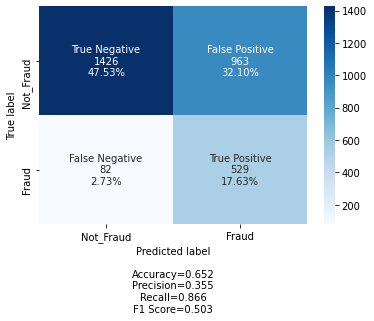

In [ ]:
## Confusion Matrix on test set
y_pred1 = model_X.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0
        
cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Fraud','Fraud']
make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

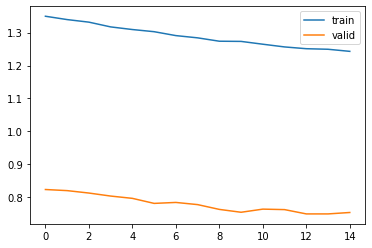

In [ ]:
# Capturing learning history per epoch
hist  = pd.DataFrame(historyX.history)
hist['epoch'] = historyX.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

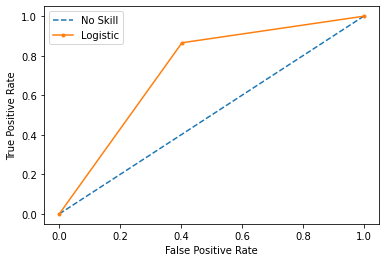

In [ ]:
# ROC Curve
yhat = model_X.predict_proba(X_test)

yhat = np.around(yhat, decimals=0, out=None).flatten().astype(int)
yhat = pd.Series(yhat)

fpr, tpr, thresholds = roc_curve(y_test, yhat)
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Logistic')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

# **Model Performance Evaluation**

In [ ]:
#Mode Performance
compare = {'Accuracy': [A_accuracy, B_accuracy, C_accuracy, D_accuracy, E_accuracy, X_accuracy],
           'Precision': [A_precision, B_precision, C_precision, D_precision, E_precision, X_precision],
           'Recall': [A_recall, B_recall, C_recall, D_recall, E_recall, X_recall],
           'F1': [A_f1, B_f1, C_f1, D_f1, E_f1, X_f1]
           }
df_performance = pd.DataFrame(compare, index =['model_A',
                                'model_B',
                                'model_C',
                                'model_D',
                                'model_E',
                                'model_X'])
df_performance

,Accuracy,Precision,Recall,F1
model_A,0.6133333444595337,0.3321100917431193,0.8887070376432079,0.4835262689225289
model_B,0.5633333325386047,0.30807248764415157,0.9181669394435352,0.46134868421052627
model_C,0.8399999737739563,0.6498855835240275,0.46481178396072015,0.5419847328244275
model_D,0.7213333249092102,0.4032674118658641,0.7675941080196399,0.5287485907553552
model_E,0.7870000004768372,0.4830508474576271,0.6530278232405892,0.5553235908141962
model_X,0.6516666412353516,0.35455764075067026,0.8657937806873978,0.5030908226343319


**`Model_X`** is the best model taking into consideration a high recall score while maintaining reasonable balance. Let's look at the confiusion matrix again for this model.

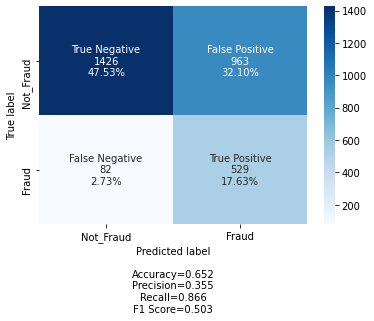

In [ ]:
## Confusion Matrix for Model_X
y_pred1 = model_X.predict(X_test)
for i in range(len(y_test)):
    if y_pred1[i]>0.5:
        y_pred1[i]=1 
    else:
        y_pred1[i]=0
        
cm2=confusion_matrix(y_test, y_pred1)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = [ 'Not_Fraud','Fraud']
make_confusion_matrix(cm2, group_names=labels,categories=categories, cmap='Blues')

With Model_X, we see that True Postives far exceed False Negatives.

True Negatives exceed False Positives.

These ratios provide the best balance and will prevent an inundation of False Postives that will occur with other models that have a recall over 90%.

`Additional remarks about model building with this dataset`

In previous versions of this notebook, we tried a variety of combinations that included more hidden layers, more neurons, excessive DropOuts, more activation functions including ReLU and different optimizers. We found that best results were achieved when keeping the number of neurons and layers to a minimum. ReLU consistently decreased model performance. Adam was the best Optimizer. The results in this notebook are the best results given the time limit for this assignment. I think I could squeeze out a few more points per metric with more time to experiment. Looking forward to finding new ways of improving models for this dataset in the future.

# **Conclusions and Business Insights**

  - Focus on customers in Germany, the churn rate is highest for customers in Germany
  - Focus on Female customers. Females have a higher churn rate than Males
  - The churn rate is highest in the age range from late 30s to mid 50s
  - Focus on customers with more than 2 products. Churn increases exponentially once number of products is greater than 2
  - Find a way to keep customers active. Inactivity precedes churn.
  - Customers at the low end of the Credit Rating scale churn at a high frequency. Perhaps credit counseling services could be targeted to customers in this group.


In [17]:
%%shell
jupyter nbconvert --to html /content/BankChurn008.ipynb

[NbConvertApp] Converting notebook /content/BankChurn008.ipynb to html
[NbConvertApp] Writing 6180910 bytes to /content/BankChurn008.html
